## CLIP Architecture Overview

CLIP (Contrastive Language–Image Pre-training) is a neural network trained on a variety of (image, text) pairs. It learns to predict which text caption from a random batch of 32,768 captions is paired with a given image. This training approach allows CLIP to learn a wide range of visual concepts and associate them with their corresponding text descriptions.

The CLIP model consists of two main components:

1.  **Image Encoder:** This is typically a Vision Transformer (ViT) or ResNet that processes the input image and generates a fixed-size vector representation (embedding) of the image.
2.  **Text Encoder:** This is a Transformer-based model that processes the input text (like a caption or label) and generates a fixed-size vector representation (embedding) of the text.

During training, CLIP learns to align the image and text embeddings such that the embeddings of corresponding image-text pairs are similar, while the embeddings of mismatched pairs are dissimilar. This is achieved through a contrastive loss function.

Once trained, CLIP can be used for various tasks, such as:

*   **Image Classification:** By comparing the image embedding to the text embeddings of different class labels.
*   **Image Search:** Finding images that match a given text query.
*   **Zero-shot learning:** Classifying images into categories it hasn't explicitly seen during training, by simply providing the category names as text.

In this notebook, we are using CLIP for image-text similarity to find the best matching text label for a given image.

In [1]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Import necessary libraries:
# - CLIPProcessor and CLIPModel from the transformers library for using the CLIP model.
# - Image from PIL (Pillow) for image handling.
# - torch for tensor operations (used by the CLIP model).
# - matplotlib.pyplot for potential visualization (though not used in this specific example).

In [2]:
# Specify the pre-trained CLIP model to use
model_name = "openai/clip-vit-base-patch32"

# Load the pre-trained CLIP model
model = CLIPModel.from_pretrained(model_name)

# Load the corresponding processor for the model
processor = CLIPProcessor.from_pretrained(model_name)

# This cell initializes the CLIP model and its associated processor.
# The model_name specifies which version of CLIP to download and use.
# The processor is essential for preparing the input data (text and images) in the format expected by the model.

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [3]:
# Specify the path to the image file
image_path = "/content/abc.jpg"

# Open and load the image using PIL (Pillow)
image = Image.open(image_path)

# This cell loads the image that will be used for the image-text similarity task.
# The image_path variable holds the location of the image file.
# Image.open() from the PIL library is used to open and load the image into an Image object.

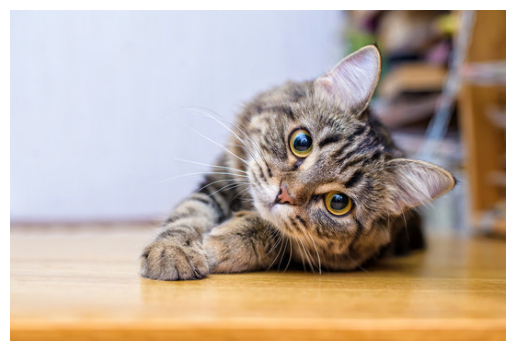

In [10]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

In [4]:
# Define a list of possible labels (captions) for the image
labels = [
    "a photo of a dog",
    "a scenic mountain",
    "a beach sunset",
    "a photo of a cat",
    "a bowl of fruit"
]

# This cell defines a list of text strings, which are the potential captions or labels for the image.
# The CLIP model will compare the image to each of these text labels to determine the best match.

In [5]:
# Process the text labels and the image using the CLIP processor
# This prepares the inputs in the correct format for the CLIP model
inputs = processor(
    text=labels,  # Provide the list of text labels
    images=image,  # Provide the image
    return_tensors="pt",  # Return the outputs as PyTorch tensors
    padding=True  # Pad the tokenized text sequences to the same length
)

# This cell uses the CLIP processor to prepare the image and text labels for the model.
# It tokenizes the text, resizes and normalizes the image, and converts them into tensors.
# return_tensors="pt" specifies that the output should be PyTorch tensors.
# padding=True ensures that all text sequences have the same length, which is required for batch processing.

In [6]:
# Disable gradient calculation for inference (saves memory and computation)
with torch.no_grad():
    # Pass the processed inputs through the CLIP model to get the outputs
    outputs = model(**inputs)

    # Extract the logits (raw predictions) for image-text similarity
    logits_per_image = outputs.logits_per_image

    # Apply softmax to convert logits into probabilities
    probs = logits_per_image.softmax(dim=1)

# This cell performs the core inference using the CLIP model.
# torch.no_grad() is used because we are not training the model, only making predictions.
# The processed inputs are passed to the model, which outputs logits representing the similarity scores.
# softmax is applied to convert these raw scores into probabilities, making them easier to interpret.

In [7]:
# Find the index of the label with the highest probability
best_idx = probs.argmax(dim=1).item()

# Get the best matching label from the labels list using the index
best_label = labels[best_idx]

# Get the probability of the best matching label
best_prob = probs[0, best_idx].item()

# This cell analyzes the probabilities calculated in the previous step.
# argmax finds the index of the highest probability, indicating the best matching label.
# The corresponding label and its probability are then extracted using this index.

In [8]:
# Print the best matching label and its corresponding probability
print(f"Best matching label: '{best_label}' with probability {best_prob:.2f}")

# This cell simply prints the result of the image-text similarity task.
# It displays the label that the CLIP model determined to be the best match for the image, along with the confidence score (probability) for that match.

Best matching label: 'a photo of a cat' with probability 0.99
